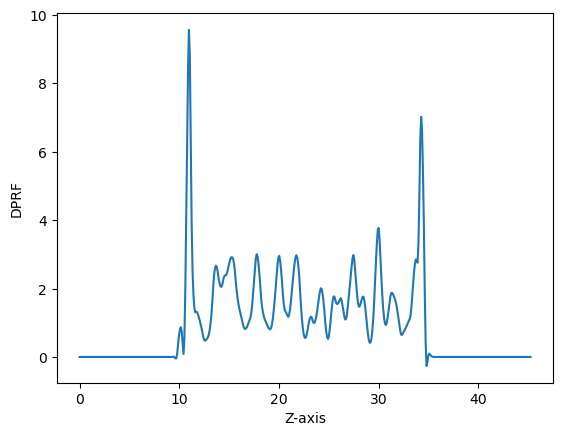

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load data (adjust delimiter if needed)
data = np.loadtxt('DPRF_O_1ps_t1_new1025.dat')  # use `delimiter=','` for CSV

x = data[:, 0]
y = data[:, 1]

plt.plot(x, y)
plt.xlabel('Z-axis')
plt.ylabel('DPRF')
# plt.title('Simple Line Plot')
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# LOAD DATA
FILENAME = "DPRF_O_1ps_t1_new1025.dat"
data = np.loadtxt(FILENAME)  
x = data[:, 0]
y = data[:, 1]

# CREATE PLOT
fig, ax = plt.subplots()

# Plot with custom color (e.g., navy blue)
ax.plot(x, y, color='navy', linewidth=2)

# Add grid
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Customize ticks
ax.tick_params(axis='both', which='major', direction='in', length=6, width=1.2, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='in', length=3, width=1)

# Optional: Set minor ticks
ax.minorticks_on()

# Labels and title (optional for now)
ax.set_xlabel('X-axis', fontsize=14)
ax.set_ylabel('Y-axis', fontsize=14)
# ax.set_title('Styled Plot from data.txt', fontsize=16)

plt.tight_layout()
plt.show()


OSError: DPRF_O_1ps_t1_new1025.dat not found.

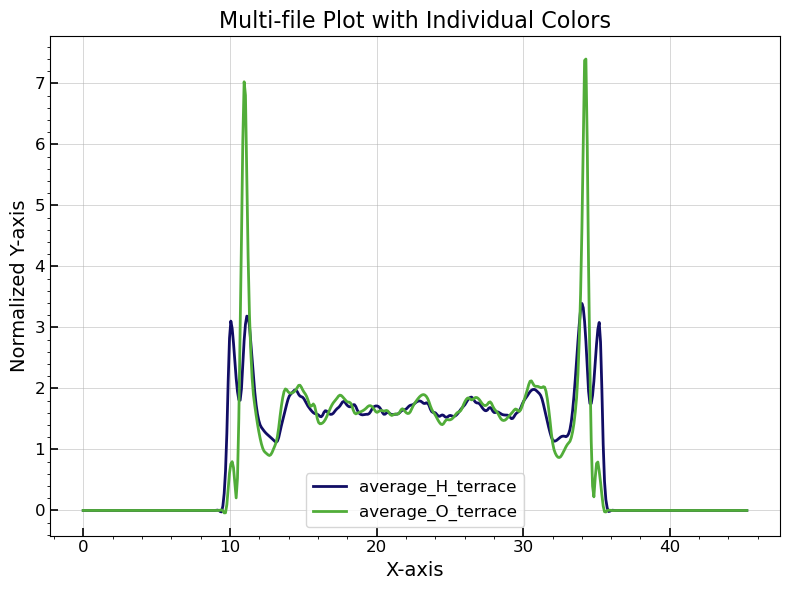

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Find all matching files
file_pattern = 'average*.dat'
filenames = sorted(glob.glob(file_pattern))

# Define the color sequence you want to apply
colors = ['#110d65', '#51ad39', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots(figsize=(8, 6))

for i, file in enumerate(filenames):
    data = np.loadtxt(file)
    x = data[:, 0]
    y = data[:, 1]
#     y_norm = y / np.max(np.abs(y))

    label = os.path.basename(file).replace('.dat', '')

    # Get color for this file by index
    color = colors[i % len(colors)]  # Will loop if more files than colors

#     ax.plot(x, y_norm, label=label, color=color, linewidth=2)
    ax.plot(x, y, label=label, color=color, linewidth=2)

# Grid and ticks
ax.grid(True, linewidth=0.5, alpha=0.7)
ax.tick_params(axis='both', which='major', direction='in', length=6, width=1.2, labelsize=12)
ax.minorticks_on()

ax.set_xlabel('X-axis', fontsize=14)
ax.set_ylabel('Normalized Y-axis', fontsize=14)
ax.set_title('Multi-file Plot with Individual Colors', fontsize=16)
ax.legend(fontsize=12, loc='best')

plt.tight_layout()
plt.savefig('multi_plot_colored_lines.png', dpi=300)
plt.show()


In [3]:
import matplotlib as mpl
print(mpl.rcParams["text.usetex"])


False


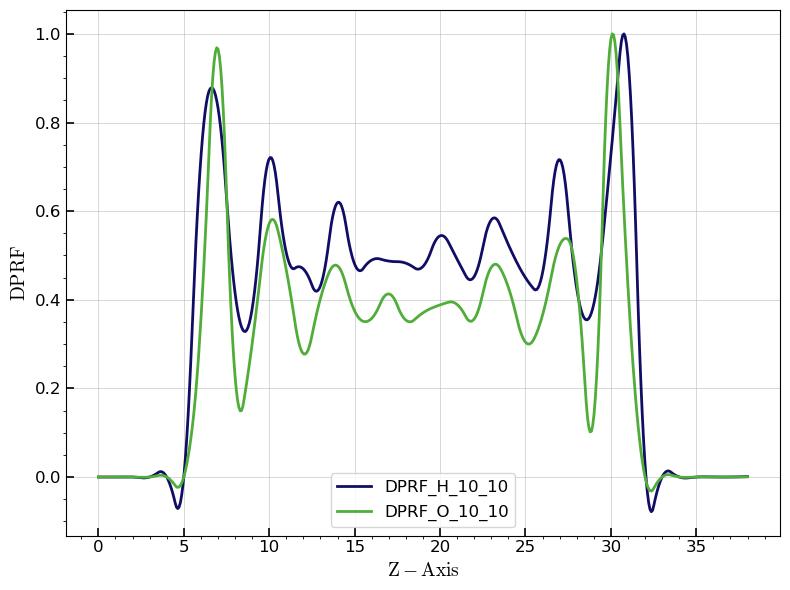

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# ✅ Use LaTeX-style fonts (Computer Modern) WITHOUT requiring LaTeX
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "mathtext.fontset": "cm",  # math font matches text
})

# Find all matching files
file_pattern = 'DPRF*.dat'
filenames = sorted(glob.glob(file_pattern))

# Define the color sequence you want to apply
colors = ['#110d65', '#51ad39', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots(figsize=(8, 6))

for i, file in enumerate(filenames):
    data = np.loadtxt(file)
    x = data[:, 0]
    y = data[:, 1]
    y_norm = y / np.max(np.abs(y))

    label = os.path.basename(file).replace('.dat', '')

    # Get color for this file by index
    color = colors[i % len(colors)]

    ax.plot(x, y_norm, label=label, color=color, linewidth=2)

# Grid and ticks
ax.grid(True, linewidth=0.5, alpha=0.7)
ax.tick_params(axis='both', which='major', direction='in', length=6, width=1.2, labelsize=12)
ax.minorticks_on()

ax.set_xlabel(r'$\mathrm{Z-Axis}$', fontsize=14)   # r'' allows math notation if needed
ax.set_ylabel(r'$\mathrm{DPRF}$', fontsize=14)
ax.legend(fontsize=12, loc='best')

plt.tight_layout()
plt.savefig('multi_plot_colored_lines.png', dpi=300)
plt.show()


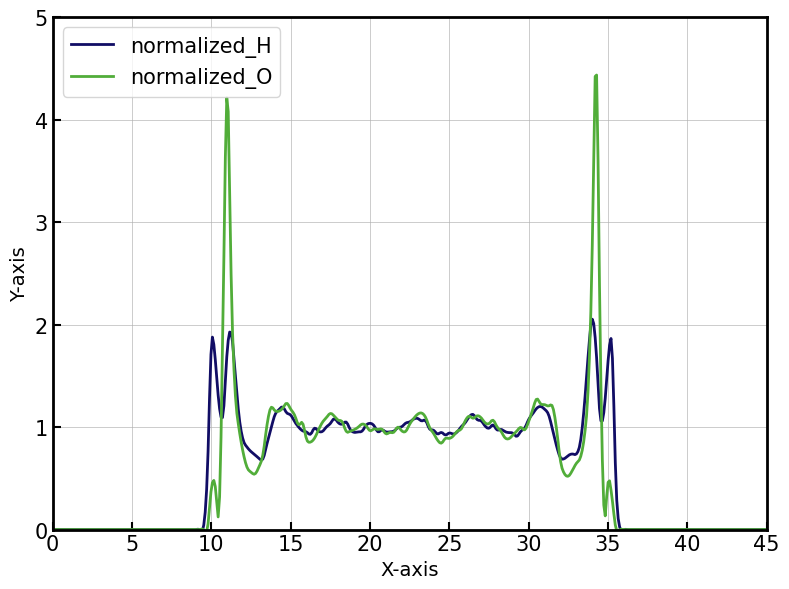

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Find all matching files
file_pattern = 'normalize*.dat'
filenames = sorted(glob.glob(file_pattern))

# Define the color sequence you want to apply
colors = ['#110d65', '#51ad39', 'blue', 'green', 'orange', 'purple']

# Define custom shifts for specific files by index (0-based)
# Example: shift 2nd file by +5, 4th file by -2.5
shift_map = {
    1: 0,     # shift the second dataset (index 1)
#     3: -2.5   # shift the fourth dataset (index 3)
}

fig, ax = plt.subplots(figsize=(8, 6))

for i, file in enumerate(filenames):
    data = np.loadtxt(file)
    x = data[:, 0]
    y = data[:, 1]

    # Apply custom shift if specified in shift_map
    y += shift_map.get(i, 0)

    label = os.path.basename(file).replace('.dat', '')
    color = colors[i % len(colors)]

    ax.plot(x, y, label=label, color=color, linewidth=2)

# Grid and ticks
# Set axis limits if needed
ax.set_xlim(0, 45)
ax.set_ylim(0, 5)

# ✅ Set border thickness (spines)
for spine in ax.spines.values():
    spine.set_linewidth(2.)

# ✅ Set tick thickness, length, and label size
ax.tick_params(axis='both', which='major', direction='in', length=6, width=1.5, labelsize=15)
ax.tick_params(axis='both', which='minor', direction='in', length=3, width=1.0)

# Grid, labels, title, legend
ax.grid(True, linewidth=0.5, alpha=0.9)
ax.set_xlabel('X-axis', fontsize=14)
ax.set_ylabel('Y-axis', fontsize=14)
# ax.set_title('Your Title', fontsize=16)
ax.legend(fontsize=15)

# ✅ Must be after all visual settings
plt.tight_layout()
plt.savefig('your_output.pdf', dpi=300)
plt.show()


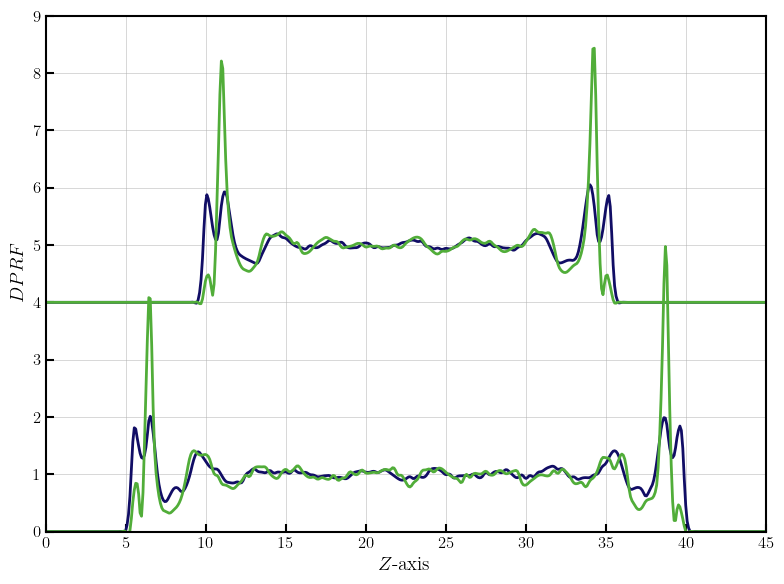

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from matplotlib.ticker import MultipleLocator

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.labelsize": 14,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

file_pattern = '*.dat'
filenames = sorted(glob.glob(file_pattern))

# colors = ['#110d65', '#51ad39', '#110d65', '#51ad39' ]
colors = ['#110d65', '#110d65', '#51ad39', '#51ad39' ]

shift_map = {1:4, 3:4}

fig, ax = plt.subplots(figsize=(8, 6))

for i, file in enumerate(filenames):
    data = np.loadtxt(file)
    x = data[:, 0]
    y = data[:, 1]
    y += shift_map.get(i, 0)
    label = os.path.basename(file).replace('.dat', '')
    color = colors[i % len(colors)]
    ax.plot(x, y, label=label, color=color, linewidth=2)

ax.set_xlim(0, 45)
ax.set_ylim(0, 9)

# Set major tick step
ax.xaxis.set_major_locator(MultipleLocator(5))  # X ticks every 
ax.yaxis.set_major_locator(MultipleLocator(1))  # Y ticks every 

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

ax.tick_params(axis='both', which='major', direction='in', length=6, width=1.5, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='in', length=3, width=1.0)

ax.grid(True, linewidth=0.5, alpha=0.7)

ax.set_xlabel(r'$Z$-axis', fontsize=14)
ax.set_ylabel(r'$DPRF$', fontsize=14)
# ax.set_title(r'\textbf{Multi-file Plot with LaTeX Fonts}', fontsize=16)
# ax.legend()
# ax.legend(loc='upper center', fontsize=12)

# legend = ax.legend(loc='upper center', fontsize=12)
# for text in legend.get_texts():
#     text.set_rotation(45)



# plt.tight_layout()
# plt.savefig('your_output.pdf', dpi=300)

plt.tight_layout()
plt.savefig('DPRF.png', dpi=300)
plt.show()
